# SQL query and Data Analysis (Visualisation)

## Question 1 (60 points): Perform following tasks using SQL statements

## Answer:

### Part 1: (20 pts) Read the data from my MySQL database and display the vacancies that require Python skill in Almaty.

In [9]:
# Table Name: vacancies
# Server: db4free.net
# Database Name: wegebiro
# Username: wegebiro
# Password: wegebiro

In [5]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import mysql.connector

# Establish connection to the database
db_connection = mysql.connector.connect(
    host="db4free.net",
    user="wegebiro",
    password="wegebiro",
    database="wegebiro"
)

# Create a cursor to execute queries
cursor = db_connection.cursor()

# SQL query to fetch vacancies in Almaty requiring Python skills
query = """
SELECT *
FROM vacancies
WHERE City = 'Almaty'
AND `Key skills` LIKE '%Python%';
"""

# Execute the query
cursor.execute(query)

# Fetch all results
vacancies = cursor.fetchall()

# Display the results
for vacancy in vacancies:
    print(vacancy)

# Close the cursor and connection
cursor.close()
db_connection.close()

(6, 'Python-backend (Middle / Senior)', 'IDSOFT', 700000.0, 'Almaty', 1.0, 'Full', 'Russian, Python, Django', '18.12.2021')
(9, 'DevOps intern', 'EPAM Kazakhstan', None, 'Almaty', 0.0, 'Internship', 'Linux, Python, English', '17.12.2021')
(10, 'Python developer', 'Kolesa Group', 700000.0, 'Almaty', 1.0, 'Full', 'Python, Docker, API', '15.12.2021')
(40, 'Python teacher', 'Morrison Academy', 75000.0, 'Almaty', 0.0, 'Part-time, remote', 'Python, creativity, learning skills', '16.12.2021')
(63, 'AI engineer', ' Relog.kz', 900000.0, 'Almaty', 3.0, 'Full', 'Python, C++, JS', '19.12.2021')
(74, 'Junior Data Miner', 'Kaspi Bank', None, 'Almaty', 0.0, 'Full', 'Data Mining, Python, SQL', '20.11.2021')
(75, 'Python developer', 'Expertonica', 450000.0, 'Almaty', 1.0, 'Full', 'Python, Django, Linux', '19.12.2021')
(80, 'PHP developer', 'NLS Kazakhstan', 400000.0, 'Almaty', 3.0, 'Full', 'PHP, Linux, Python', '17.12.2021')
(132, 'Junior Back end/ Go developer', 'Leopart Center', None, 'Almaty', None,

### Part 2: (20 pts) Display the company and position of the vacancies that require less than 3 years of experience. 

In [11]:
# Establish connection to the database
db_connection = mysql.connector.connect(
    host="db4free.net",
    user="wegebiro",
    password="wegebiro",
    database="wegebiro"
)

# Create a cursor to execute queries
cursor = db_connection.cursor()

# SQL query to fetch company and position for vacancies requiring less than 3 years of experience
query = """
SELECT Company, Position
FROM vacancies
WHERE ExperienceYear < 3;
"""

# Execute the query
cursor.execute(query)

# Fetch all results
vacancies = cursor.fetchall()

# Display the results
for vacancy in vacancies:
    print(f"Company: {vacancy[0]}, Position: {vacancy[1]}")

# Close the cursor and connection
cursor.close()
db_connection.close()

Company: Xbase, Position: Java Backend Developer (Junior/Middle)
Company:  Zaman 01, Position: System administrator
Company: Halyk Bank, Position: IT Intern
Company: EPAM Kazakhstan, Position: Delphi Developer Intern
Company: Digital Business Services, Position: Flutter developer
Company: IDSOFT, Position: Python-backend (Middle / Senior)
Company: Atlant Building KZ, Position: System administrator
Company: WOOPPAY, Position: iOS developer
Company: EPAM Kazakhstan, Position: DevOps intern
Company: Kolesa Group, Position: Python developer
Company: Aleks Asu, Position: Designer
Company: Alpha Bank, Position:  IT speciality
Company: KMF, Position: System administrator
Company: IT Park, Position: PHP developer
Company: EVRiKA, Position: Web developer
Company: Satti Logistics, Position: PHP Backend Developer
Company: Kemel Bolashaq, Position: Designer
Company: KMGP, Position: C# developer
Company: Citicom Systems, Position: JavaScript developer
Company: Leopart Center, Position: Frontend dev

### Part 3: (20 pts) Sort the full-time vacancies by their “salary” and display the company and position the top-3 highest salaries.

In [12]:
# Establish connection to the database
db_connection = mysql.connector.connect(
    host="db4free.net",
    user="wegebiro",
    password="wegebiro",
    database="wegebiro"
)

# Create a cursor to execute queries
cursor = db_connection.cursor()

# SQL query to fetch the top-3 full-time vacancies sorted by salary
query = """
SELECT Company, Position, Salary
FROM vacancies
WHERE Employment LIKE '%full%'  -- Matches 'full', 'ful', 'Full'
ORDER BY Salary DESC
LIMIT 3;
"""

# Execute the query
cursor.execute(query)

# Fetch the top-3 results
vacancies = cursor.fetchall()

# Display the results
if vacancies:
    for vacancy in vacancies:
        print(f"Company: {vacancy[0]}, Position: {vacancy[1]}, Salary: {vacancy[2]}")
else:
    print("No results found.")

# Close the cursor and connection
cursor.close()
db_connection.close()

Company: FE OTVET.KZ, Position: Tech Leader, Salary: 1500000.0
Company: KMG Engineering, Position: Fullstack developer, Salary: 1500000.0
Company: MFO OnlineKazFinance LLP, Position: Java Developer Backend, Salary: 1500000.0


## Question 2 (40 pts): For Question 2, you will use the IMDB-Movie-Data.csv dataset, which is movie data from 2006 to 2016. 

## Answer to question 2

### Part 1: (10 pts) Using an appropriate visual, find in which year the most revenue is obtained.

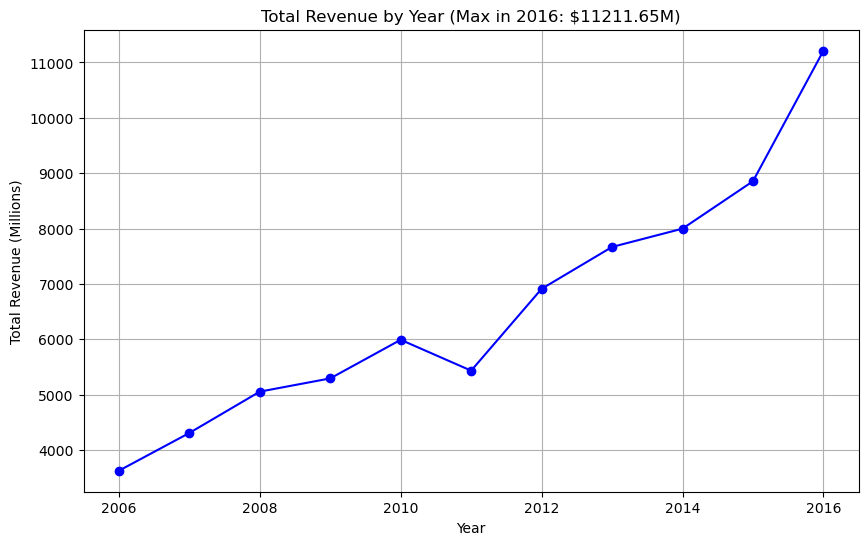

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('IMDB-Movie-Data.csv')

# Group by 'Year' and calculate the total revenue for each year
revenue_by_year = df.groupby('Year')['Revenue (Millions)'].sum()

# Find the year with the highest total revenue
max_revenue_year = revenue_by_year.idxmax()
max_revenue_value = revenue_by_year.max()

# Plotting the revenue by year
plt.figure(figsize=(10,6))
plt.plot(revenue_by_year.index, revenue_by_year.values, marker='o', linestyle='-', color='b')
plt.title(f"Total Revenue by Year (Max in {max_revenue_year}: ${max_revenue_value}M)")
plt.xlabel('Year')
plt.ylabel('Total Revenue (Millions)')
plt.grid(True)
plt.show()

### Part 2: (15 pts) Plot a histogram on the Rating variable using genre.

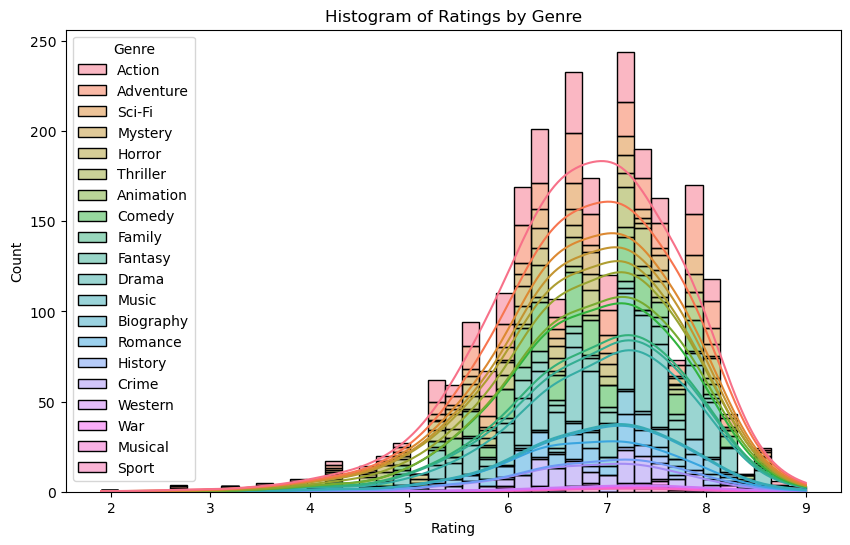

In [15]:
import seaborn as sns

# Assuming the dataset is stored in a DataFrame named df
# Sample data frame for the sake of demonstration
file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)

# Split the genre by commas for multiple genres
df['Genre'] = df['Genre'].apply(lambda x: x.split(','))

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df.explode('Genre'), x='Rating', hue='Genre', multiple="stack", kde=True)
plt.title('Histogram of Ratings by Genre')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Part 3: (15 pts) Plot a stacked area chart showing sum of rating, sum of rank and sum of metascore by year.

<Figure size 1000x600 with 0 Axes>

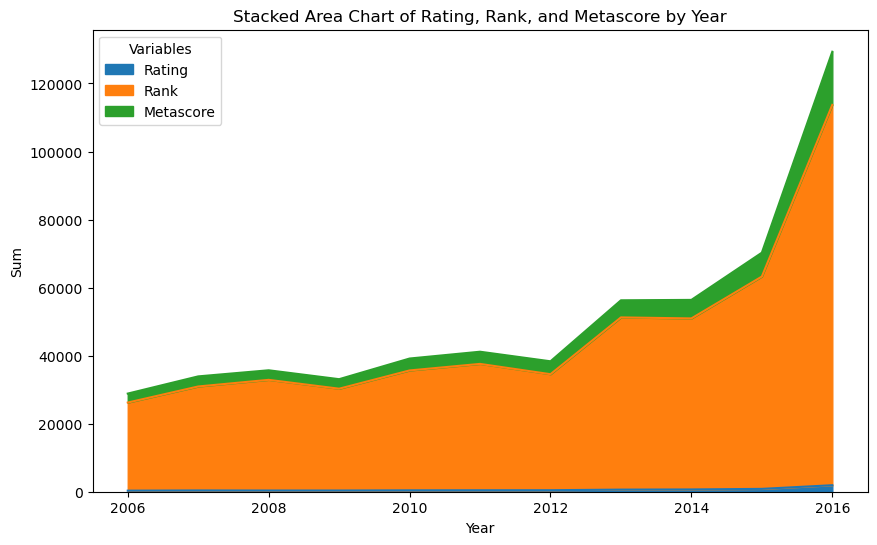

In [16]:
# Sample data frame for the sake of demonstration
data = "IMDB-Movie-Data.csv"
df = pd.read_csv(data)

# Grouping by 'Year' and aggregating the sum of 'Rating', 'Rank', and 'Metascore'
df_yearly = df.groupby('Year')[['Rating', 'Rank', 'Metascore']].sum()

# Plotting the stacked area chart
plt.figure(figsize=(10, 6))
df_yearly.plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Stacked Area Chart of Rating, Rank, and Metascore by Year')
plt.xlabel('Year')
plt.ylabel('Sum')
plt.legend(title='Variables')
plt.show()